# Assignment:

1. Perform some movie recommendations and analysis for user 2:
- How many movies has this user watched?
- Plot a bar chart of their movie ratings. The bar chart should be the counts of the number of unique ratings.
    - Hint: the `sort_index()` function from pandas might be helpful to make the bar plot look nicer.
- What are some of user 2's top movies?
    - Hint: to get the actual movie titles, you can use pandas [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function, although using the movie IDs is OK too.
- Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.
- Recommend a few movies for user 2 using similarity metrics.
- Do the recommendations from this method make sense?
- Write a short analysis of the results, and justify which similarity metric(s) you used.

Optional challenges:
- Perform other analyses (e.g. EDA, visualizations) of the movies watched from this dataset, or from a bigger part of the dataset for the movielens dataset: https://grouplens.org/datasets/movielens/
- Add yourself as a user in the data with ratings for movies you've watched, and find recommendations for next movies to watch. 
- Use a more advanced collaborative or content-based recommender to make recommendations (e.g. using the surprise package in Python)
    - Try making predictions for user 2. How do they compare with our basic model?
    - Add your own movie ratings, or use another recommender dataset and add your own preferences, then get recommendations for yourself

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
import pandas as pd

dfMovies = pd.read_csv('movies.csv')
dfMovies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [29]:
print(f"Number of unique Movies amount: {len(pd.unique(dfMovies['title']))}")


Number of unique Movies amount: 9737


In [53]:
import pandas as pd

ratings = pd.read_csv('ratings.csv')


In [7]:
df = df[df['userId'] == 2]


,userId,movieId,rating,timestamp
232,2,318,3.0,1445714835
233,2,333,4.0,1445715029
234,2,1704,4.5,1445715228
235,2,3578,4.0,1445714885
236,2,6874,4.0,1445714952
237,2,8798,3.5,1445714960
238,2,46970,4.0,1445715013
239,2,48516,4.0,1445715064
240,2,58559,4.5,1445715141
241,2,60756,5.0,1445714980


In [8]:
print(f"Wathced Movies amount: {len(pd.unique(df['movieId']))}")


Wathced Movies amount: 29


In [54]:
ratings.groupby('movieId').sum()

,userId,rating,timestamp
movieId,,,
1,65904,843.0,242914455479
2,36251,377.5,124938583322
3,14747,169.5,52265734386
4,1539,16.5,6290052048
5,14679,150.5,48640552594
...,...,...,...
193581,184,4.0,1537109082
193583,184,3.5,1537109545
193585,184,3.5,1537109805


In [55]:
dfMovies.set_index('movieId', inplace=True)

In [57]:
top_idx = ratings.groupby('movieId').sum().sort_values(by='rating', ascending=False).index
dfMovies.loc[top_idx]

,title,genres
movieId,,
318,"Shawshank Redemption, The (1994)",Crime|Drama
356,Forrest Gump (1994),Comedy|Drama|Romance|War
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
...,...,...
160872,Satanic (2016),Horror
8236,While the City Sleeps (1956),Drama|Film-Noir
57326,In the Name of the King: A Dungeon Siege Tale ...,Action|Adventure|Fantasy


In [59]:
pd.concat([dfMovies, ratings.groupby('movieId').sum()], axis=1).sort_values(by='rating', ascending=False)

,title,genres,userId,rating,timestamp
movieId,,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,95829.0,1404.0,3.769248e+11
356,Forrest Gump (1994),Comedy|Drama|Romance|War,101385.0,1370.0,3.861652e+11
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,90621.0,1288.5,3.492043e+11
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,85236.0,1165.5,3.502700e+11
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,85535.0,1161.0,3.200357e+11
...,...,...,...,...,...
30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN,NaN,NaN
32160,Twentieth Century (1934),Comedy,NaN,NaN,NaN
32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN,NaN,NaN


In [60]:
wide = ratings.pivot(index='userId', columns='movieId', values='rating')
wide.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
wide.fillna(-1, inplace=True)

In [62]:
wide

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,-1.0,4.0,-1.0,-1.0,4.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,-1.0,-1.0,-1.0,-1.0,-1.0,2.5,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
607,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
608,2.5,2.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [63]:
cor = wide.T.corr()

In [64]:
cor.loc[1].sort_values(ascending=False)

userId
1      1.000000
313    0.344053
266    0.342889
57     0.324486
39     0.324205
         ...   
496   -0.008249
556   -0.008840
506   -0.009832
184   -0.011859
306   -0.016454
Name: 1, Length: 610, dtype: float64

In [65]:
wide.loc[1].notna().equals(wide.loc[146].notna())

True

In [66]:
rated_5_by_146_not_watched_by_1 = (wide.loc[146] == 5) & (wide.loc[1].isna())
print(wide.loc[1][rated_5_by_146_not_watched_by_1])
print(wide.loc[146][rated_5_by_146_not_watched_by_1])

Series([], Name: 1, dtype: float64)
Series([], Name: 146, dtype: float64)


In [67]:
wide.fillna(-1, inplace=True)

In [68]:
euclidean(wide.iloc[1], wide.iloc[146])

33.91902121229325

In [69]:
from scipy.spatial.distance import pdist, squareform

In [70]:
euclidean_distances = squareform(pdist(wide, metric=euclidean)) # or metric='euclidean'

In [71]:
euclidean_df = pd.DataFrame(data=euclidean_distances, columns=wide.index, index=wide.index)

In [72]:
euclidean_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,86.239492,84.731930,96.979379,84.516271,108.083301,91.651514,84.380092,86.203248,96.969067,...,95.430603,90.288427,147.939177,91.350972,96.224997,165.230143,90.862534,126.232920,84.279298,179.904836
2,86.239492,0.000000,36.806929,74.567084,41.039615,84.777650,60.172668,41.318882,40.450587,57.295288,...,55.859198,58.423026,145.090489,52.822817,69.235107,158.923724,71.674612,124.893955,37.016888,171.373860
3,84.731930,36.806929,0.000000,73.908727,39.956226,84.584277,60.112395,40.441316,39.172695,58.150666,...,59.895743,57.701820,144.296570,51.850747,68.233057,158.848985,70.664701,124.946989,36.173194,172.971819
4,96.979379,74.567084,73.908727,0.000000,72.608539,101.847926,83.330667,74.639132,75.591005,85.743804,...,84.604964,81.455509,137.952891,81.018516,90.461318,158.726179,89.693924,131.524713,73.593478,178.462181
5,84.516271,41.039615,39.956226,72.608539,0.000000,77.479029,59.958319,33.837849,43.543082,60.274373,...,61.253571,48.383882,142.762040,47.833043,66.740168,157.171880,69.188149,122.697799,35.270384,172.935682


In [73]:
euclidean_df.loc[1].sort_values().loc[146]

85.6489929888263

In [74]:
cosine_distances = squareform(pdist(wide, metric='cosine'))
cosine_df = pd.DataFrame(cosine_distances, columns=wide.index, index=wide.index)
cosine_df.loc[1].sort_values()

userId
1      0.000000
39     0.256315
493    0.257912
96     0.262586
164    0.265731
         ...   
448    0.741735
610    0.774839
599    0.810149
474    0.862710
414    0.917347
Name: 1, Length: 610, dtype: float64

In [75]:
cosine_df.loc[1].sort_values().loc[146]

0.2944685362405085

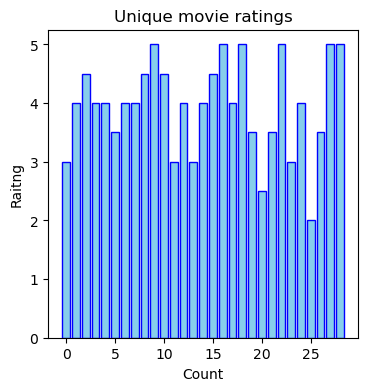

In [21]:
plt.figure(figsize=(4, 4))

plt.bar(range(len(df)), df['rating'], color='skyblue', edgecolor='blue')

plt.xlabel('Count')
plt.ylabel('Raitng')
plt.title('Unique movie ratings')

# Display the chart
plt.show()

In [24]:
user2Top = df[df['rating'] > 4]

In [26]:
user2Top

,userId,movieId,rating,timestamp
234,2,1704,4.5,1445715228
240,2,58559,4.5,1445715141
241,2,60756,5.0,1445714980
242,2,68157,4.5,1445715154
247,2,80489,4.5,1445715340
248,2,80906,5.0,1445715172
250,2,89774,5.0,1445715189
254,2,106782,5.0,1445714966
259,2,122882,5.0,1445715272
260,2,131724,5.0,1445714851


In [30]:
dfToMerge = pd.merge(df, dfMovies, on='movieId', how='inner')
dfToMerge

,userId,movieId,rating,timestamp,title,genres
0,2,318,3.0,1445714835,"Shawshank Redemption, The (1994)",Crime|Drama
1,2,333,4.0,1445715029,Tommy Boy (1995),Comedy
2,2,1704,4.5,1445715228,Good Will Hunting (1997),Drama|Romance
3,2,3578,4.0,1445714885,Gladiator (2000),Action|Adventure|Drama
4,2,6874,4.0,1445714952,Kill Bill: Vol. 1 (2003),Action|Crime|Thriller
5,2,8798,3.5,1445714960,Collateral (2004),Action|Crime|Drama|Thriller
6,2,46970,4.0,1445715013,Talladega Nights: The Ballad of Ricky Bobby (2...,Action|Comedy
7,2,48516,4.0,1445715064,"Departed, The (2006)",Crime|Drama|Thriller
8,2,58559,4.5,1445715141,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
9,2,60756,5.0,1445714980,Step Brothers (2008),Comedy


In [32]:
user2Top = dfToMerge[dfToMerge['rating'] > 4]
user2Top

,userId,movieId,rating,timestamp,title,genres
2,2,1704,4.5,1445715228,Good Will Hunting (1997),Drama|Romance
8,2,58559,4.5,1445715141,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
9,2,60756,5.0,1445714980,Step Brothers (2008),Comedy
10,2,68157,4.5,1445715154,Inglourious Basterds (2009),Action|Drama|War
15,2,80489,4.5,1445715340,"Town, The (2010)",Crime|Drama|Thriller
16,2,80906,5.0,1445715172,Inside Job (2010),Documentary
18,2,89774,5.0,1445715189,Warrior (2011),Drama
22,2,106782,5.0,1445714966,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama
27,2,122882,5.0,1445715272,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller
28,2,131724,5.0,1445714851,The Jinx: The Life and Deaths of Robert Durst ...,Documentary


# Analysis/Summary

During this assignment, there was a number of things that needed to be accomplised. I first sorted the user 2 information and got the required data that was asked for. This was not complicated; however, knowing the right commands proved to be a challenged as this is something, I am not working with daily. I was able to place the bar graph as required and provide 2 distance metrics. I do not think the recommendations make any sense, I find this to be something like Netlfix has. There is a probability in certain cases, but I would not use these recommendations. I found this assignment though challengning eye opening. The amount of things you can do with data still amazes me!